<a href="https://colab.research.google.com/github/fitrieratna/DataScience-Portfolio/blob/master/Startup%20Profit%20Prediction%20using%20Multi_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

In [4]:
# To connect Google Drive (GDrive) with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
f = open('/content/gdrive/My Drive/Data Source/50_Startups.csv','rb')
line = f.readline()
print(chardet.detect(line))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [6]:
data = pd.read_csv('/content/gdrive/My Drive/Data Source/50_Startups.csv')

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory Data Analysis

## Check Data Accountability 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
missing_data = data.isnull()

for column in missing_data.columns.values.tolist():
 print (column)
 print (missing_data[column].value_counts())
 print("")  
 

R&D Spend
False    50
Name: R&D Spend, dtype: int64

Administration
False    50
Name: Administration, dtype: int64

Marketing Spend
False    50
Name: Marketing Spend, dtype: int64

State
False    50
Name: State, dtype: int64

Profit
False    50
Name: Profit, dtype: int64



No missing value found and values seems make sense to proceed.

Then we see the pairplot of whole dataset.

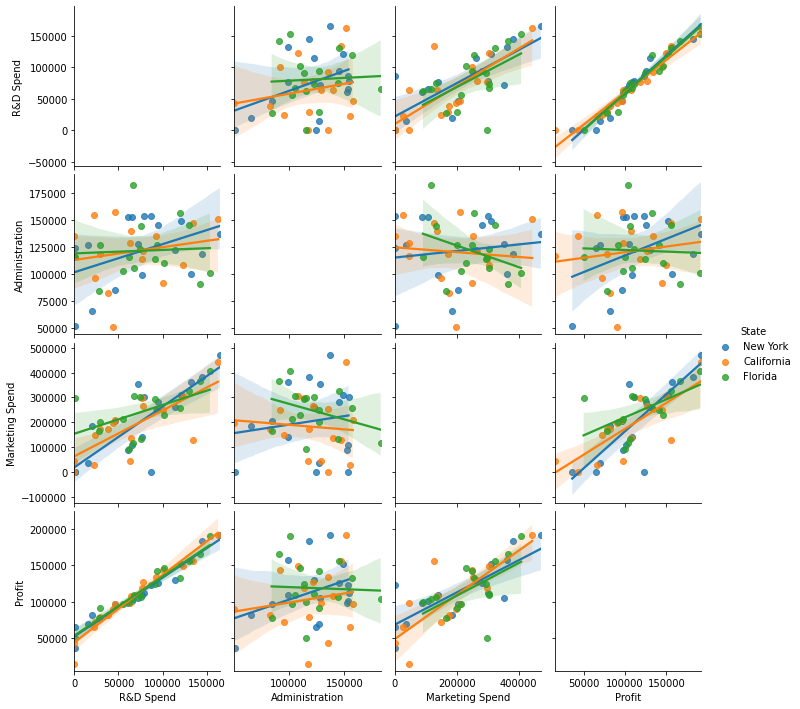

In [11]:
# Numerical columns
sns.pairplot(data, kind="reg", diag_kind="",  hue="State")
plt.show()


## Boxplot of each variable

R&D Spend             AxesSubplot(0.125,0.536818;0.352273x0.343182)
Administration     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Marketing Spend          AxesSubplot(0.125,0.125;0.352273x0.343182)
Profit                AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

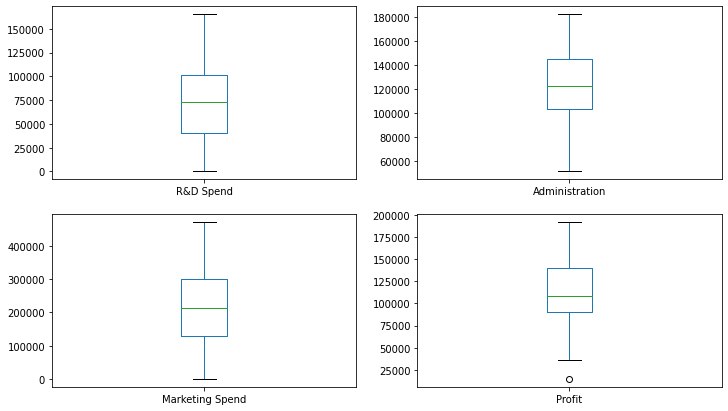

In [12]:
data.plot(kind='box',subplots=True,layout=(2,2),figsize=(12,7))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


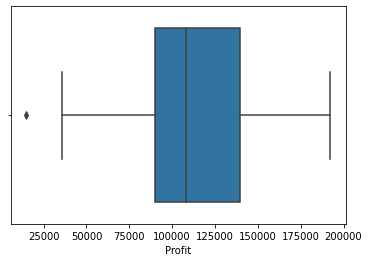

In [13]:
sns.boxplot(data["Profit"])

There's an outlier in Profit, later we will fix this in data wrangling

## Correlation of each variable

In [14]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


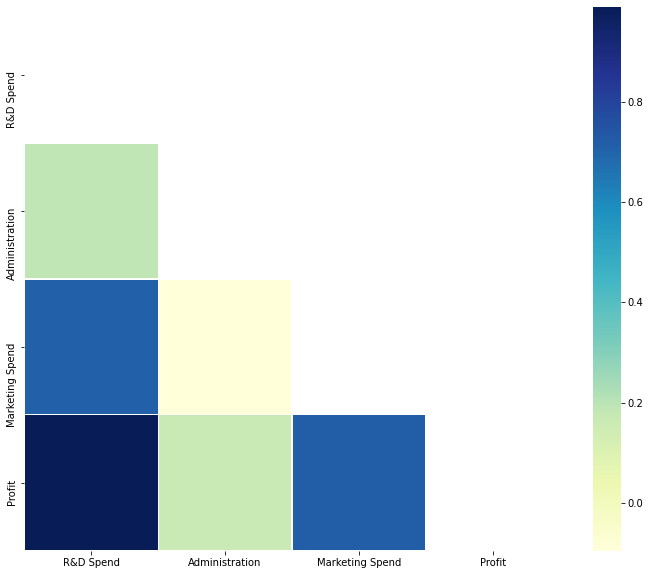

In [15]:
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = False)

In [16]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [17]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

## Check Multicollinearity between Variables

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

With this terms, feature R&D Spend and Marketing Spend have high multicollinearity, or correlated each other ~ which this could lead high variance and error rate in model.

Then we will be using more robust model that could combat this issue: Lasso, Ridge, ElasticNet later on, compares to Linear Regression.

## Check target distribution

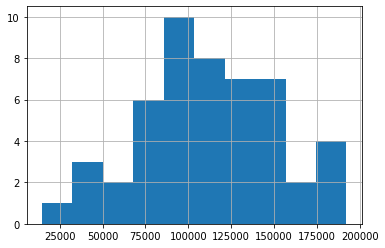

In [19]:
data.Profit.hist()

In [20]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(data.Profit.values) 

NormaltestResult(statistic=0.017927081855183012, pvalue=0.9910765118444982)

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


Hence we can say, target variable or Profit from this case is in normal distribution. Thus residual in normal distribution would be achieved and no need to transform target variable.

# Data Wrangling

### 1. Label Encoding

In [21]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data_ = pd.get_dummies(data, columns=one_hot_encode_cols)

In [22]:
one_hot_encode_cols

['State']

In [23]:
data_.head() #data_ : data with label encoded

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### 2. Remove Outlier (Profit has outlier value)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


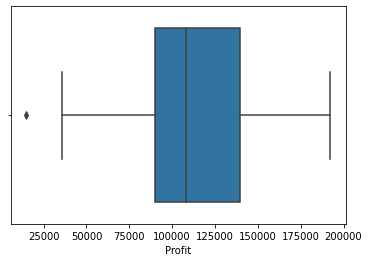

In [24]:
sns.boxplot(data_["Profit"])

In [26]:
#calculate interquartile range

Q1 = data['Profit'][data['Profit'] != 0].quantile(0.25)
Q2 = data['Profit'][data['Profit'] != 0].quantile(0.50)
Q3 = data['Profit'][data['Profit'] != 0].quantile(0.75)
IQR = Q3-Q1

#calculate min/max limits tp be considered as outlier

lower_bounds = Q1 - 1.5*(IQR)
upper_bounds = Q3 + 1.5*(IQR)

print ('Lower Bounds : ',lower_bounds,
       'Quartile 1 : ',Q1, 
       'Median:' , Q2, 
       'Quartile 3:', Q3, 
       'Upper Bounds',upper_bounds)


Lower Bounds :  15698.290000000023 Quartile 1 :  90138.9025 Median: 107978.19 Quartile 3: 139765.97749999998 Upper Bounds 214206.58999999997


In [27]:
#identify points of seed outlier
profit_without_outlier= data_[(data_['Profit'] > lower_bounds)]

profit_without_outlier = profit_without_outlier.rename(columns={0: 'seed'})
data_1 = profit_without_outlier.copy()

data_1.head() #data_1 : data without outlier in Profit. 

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


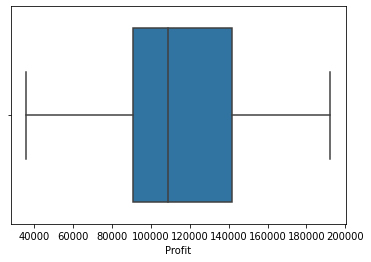

In [28]:
sns.boxplot(data_1["Profit"])

Now we're good! Outlier in Profit has been removed. 

### 3. Check Skewness

In [29]:
#Split Train and Split Test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_1, test_size=0.3, random_state=42)

In [30]:
# Create a list of float colums to check for skewing

mask = data_1.apply(lambda x:x.nunique()>2)
num_cols = data_1.columns[mask]
num_cols

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [31]:
train[num_cols].skew()

R&D Spend          0.296813
Administration    -0.105979
Marketing Spend    0.107230
Profit             0.355942
dtype: float64

In [32]:
skew_limit = 0.75
skew_vals = train[num_cols].skew()

skew_cols = (skew_vals[skew_vals>skew_limit]
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={'0':'Skew'}))
skew_cols

,0


No skewness found then no need to do X log transform to be normal distribution (remember our aim is to create a normal distribution of residual error)

# Machine Learning : Regression

## a. Linear Regression

In [33]:
feature_cols = [x for x in train.columns if x != 'Profit']
X_train = train[feature_cols]
y_train = train['Profit']

X_test  = test[feature_cols]
y_test  = test['Profit']


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

def r2(ytrue, ypredicted):
    return r2_score(ytrue,ypredicted)

In [35]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_r2 = r2(y_test, linearRegression.predict(X_test))

print('RMSE Linear Regression: ', linearRegression_rmse)
print('R2 Score Linear Regression :' ,linearRegression_r2)

RMSE Linear Regression:  8490.35912130354
R2 Score Linear Regression : 0.9484326566905074


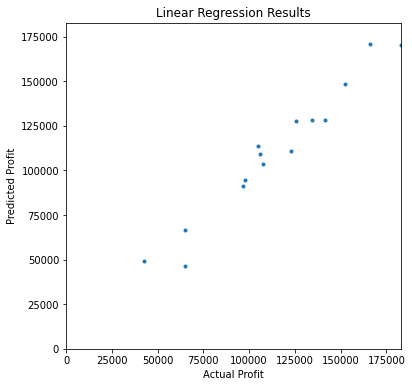

In [36]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Profit', 
       ylabel='Predicted Profit', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [37]:
linearRegression.intercept_

51879.871340742284

In [38]:
linearRegression.coef_

array([ 7.63869188e-01, -3.44251655e-02,  3.64609266e-02,  1.86318208e+03,
        9.80837003e+01, -1.96126578e+03])

In [39]:
df = pd.DataFrame(zip(X.columns, linearRegression.coef_))
df.columns = ['Predictor', 'Coefficient']
df

,Predictor,Coefficient
0,R&D Spend,0.763869
1,Administration,-0.034425
2,Marketing Spend,0.036461


## b. Lasso Regression 

In [40]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_r2 = r2(y_test, lassoCV.predict(X_test))

print('Lambda Lasso :',lassoCV.alpha_) 
print('RMSE Lasso:', lassoCV_rmse)
print('R2 Score: ', lassoCV_r2)  # Lasso is slower

Lambda Lasso : 0.0005
RMSE Lasso: 8490.35866197143
R2 Score:  0.9484326622701384


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39952715.41567016, tolerance: 3161924.7619271693
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39952460.9853158, tolerance: 3161924.7619271693
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39952728.87889886, tolerance: 3161924.7619271693
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

In [41]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 6 coefficients, 6 are non-zero with Lasso.


In [42]:
lassoCV.coef_

array([ 7.63869184e-01, -3.44251586e-02,  3.64609289e-02,  3.05548022e+03,
        1.29038134e+03, -7.68965409e+02])

In [43]:
lassoCV.intercept_

50687.57175466932

In [44]:
df1 = pd.DataFrame(zip(X.columns, lassoCV.coef_))
df1.columns = ['Predictor', 'Coefficient']
df1

,Predictor,Coefficient
0,R&D Spend,0.763869
1,Administration,-0.034425
2,Marketing Spend,0.036461


## c. Ridge Regression 

In [46]:
from sklearn.linear_model import RidgeCV


alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_r2 = r2(y_test, ridgeCV.predict(X_test))


print('Lambda RidgeCV :',ridgeCV.alpha_) 
print('RMSE RidgeCV:', ridgeCV_rmse)
print('R2 Score RidgeCV: ', ridgeCV_r2) 

Lambda RidgeCV : 80.0
RMSE RidgeCV: 8170.933126433553
R2 Score RidgeCV:  0.9522398206055459


In [47]:
print('Of {} coefficients, {} are non-zero with Ridge.'.format(len(ridgeCV.coef_), 
                                                               len(ridgeCV.coef_.nonzero()[0])))

Of 6 coefficients, 6 are non-zero with Ridge.


In [48]:
ridgeCV.coef_

array([ 7.66009808e-01, -3.53016423e-02,  3.65264303e-02,  2.16981154e+02,
        6.58955581e+00, -2.23570710e+02])

In [49]:
ridgeCV.intercept_

51860.13124385096

In [50]:
df2 = pd.DataFrame(zip(X.columns, ridgeCV.coef_)).sort_values(by=1)

df2.columns = ['Predictor', 'Coefficient']
df2

,Predictor,Coefficient
1,Administration,-0.035302
2,Marketing Spend,0.036526
0,R&D Spend,0.766010


## d. **ElasticNet** Regression 

In [51]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9) #since we want balance of L1 and L2. 
#See l1_ratios https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1000000).fit(X_train, y_train) #1e4
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_r2 = r2(y_test, elasticNetCV.predict(X_test))


print('Lambda ElasticNetCV :',elasticNetCV.alpha_) 
print('l1 Ratios: ',elasticNetCV.l1_ratio_)
print('RMSE ElasticNetCV:', elasticNetCV_rmse)
print('R2 Score ElasticNetCV: ',elasticNetCV_r2)  

Lambda ElasticNetCV : 0.0005
l1 Ratios:  0.1
RMSE ElasticNetCV: 8489.591438933636
R2 Score ElasticNetCV:  0.9484419815141218


In [52]:
elasticNetCV.coef_.ravel()

array([ 7.63872401e-01, -3.44261878e-02,  3.64611647e-02,  1.86044393e+03,
        9.78369147e+01, -1.95839148e+03])

In [53]:
elasticNetCV.intercept_

51879.82647667701

In [54]:
df2 = pd.DataFrame(zip(X.columns, elasticNetCV.coef_)).sort_values(by=1)
df2.columns = ['Predictor', 'Coefficient']
df2

,Predictor,Coefficient
1,Administration,-0.034426
2,Marketing Spend,0.036461
0,R&D Spend,0.763872


# Comparison Result

In [55]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
r2_vals = [linearRegression_r2, ridgeCV_r2, lassoCV_r2, elasticNetCV_r2]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)

rmse_df['R2'] = pd.Series(r2_vals, index=labels).to_frame()
rmse_df

,RMSE,R2
Linear,8490.359121,0.948433
Ridge,8170.933126,0.952240
Lasso,8490.358662,0.948433
ElasticNet,8489.591439,0.948442


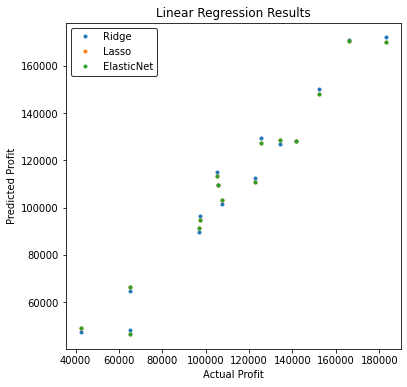

In [56]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Profit', 
       ylabel='Predicted Profit', 
       title='Linear Regression Results');

From comparison table above between four models, Ridge Regression become the best one, has just slightly better than other models. Now let's inspect the residual error from the best model we choose. 

In [73]:
Predicted_profit  = ridgeCV.predict(X_train)
residuals = y_train - Predicted_profit
Act_pred = pd.DataFrame(data={"Predicted":Predicted_profit, "Actual":y_train, "Residual Error":round(residuals,3)})
Act_pred.reset_index(drop=True, inplace=True)
Act_pred.head()

,Predicted,Actual,Residual Error
0,154662.552752,156122.51,1459.957
1,76229.949954,78239.91,2009.960
2,76250.069727,77798.83,1548.760
3,59638.404271,49490.75,-10147.654
4,144595.944456,129917.04,-14678.904


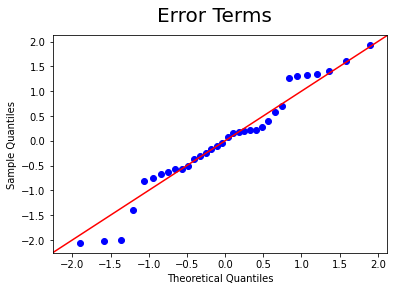

In [74]:
#The Q-Q plot infers that the residuals meets condition of homoscedasticity
import scipy.stats as stats
import statsmodels.api as sm

fig = sm.qqplot(residuals, stats.t, fit=True, line="45")
fig.suptitle("Error Terms", fontsize = 20)    
plt.show()

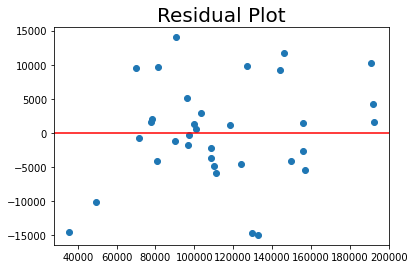

In [79]:
# The errors should not follow any pattern and equally distributed y=0(i.e; mean=0.000)

plt.scatter(y_train, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title("Residual Plot", fontsize = 20)   
plt.show()

(array([3., 1., 0., 7., 5., 8., 3., 0., 5., 2.]),
 array([-14984.88933392, -12084.04080054,  -9183.19226716,  -6282.34373378,
         -3381.49520039,   -480.64666701,   2420.20186637,   5321.05039975,
          8221.89893313,  11122.74746652,  14023.5959999 ]),
 <a list of 10 Patch objects>)

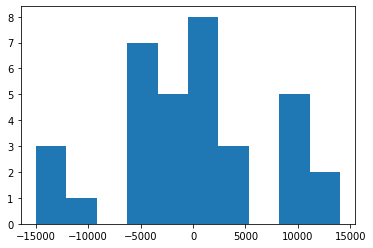

In [75]:
plt.hist(residuals)

In [76]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(residuals.values) 

NormaltestResult(statistic=0.22948007361381212, pvalue=0.8915978964180735)

We can say residual error of our best model follow Normal Distribution as it is supposed to be. 

Thus we have validation that our regression models is accountable. 

# Trivia : Predict New Dummy Data

In [71]:
row = [165000,137000,470000,0,0,0]
# make a prediction
yhat = ridgeCV.predict([row])
yhat

array([190582.84684329])